In [1]:
from neuralogic.nn import get_evaluator
from neuralogic.core import R, Template, V, Settings, Transformation, Combination, Aggregation
from neuralogic.core.constructs.function.tree import FunctionContainer
from neuralogic.core.settings import Settings
from neuralogic.dataset import Dataset
from neuralogic.optim import SGD

C:\Users\kraus\Plocha\BAK\PyNeuraLogicFork\neuralogic\core\builder\builder.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
F = FunctionContainer()     # new but necessary feature, necessary to use both round and square brackets for same purpose
train_dataset = Dataset()
template = Template()
settings = Settings(optimizer=SGD(), epochs=1)

train_dataset.add_example([R.b[3], R.c[5]])

V následující buňce je ukázka funkční nové syntaxe, kterou jsi po mně chtěl v tom nedávném emailu. Nyní fungují tyto obě varianty stejně.

Poměrně obtížné bylo zajistit, aby hranaté závorky fungovaly stejně jako kulaté a zápis aby byl přehlednější. To se mi nakonec povedlo za cenu, že třída FunctionContainer z modulu neuralogic.core.constructs.function.tree je trochu složitější a hůře čitelná.

In [3]:
# 1st option
template += (R.message2(V.X)[5,10] <= (x:= R.message1(V.Y)[10,20], y:= R.edge(V.Y, V.X))) >> F.avg(F.relu(x + y))

# 2nd option - round brackets
template += (R.message2(V.X)[5,10] <= F.avg(F.relu(R.message1(V.Y)[10,20] + R.edge(V.Y, V.X))))

# 2nd option - both round and square brackets
template += (R.message2(V.X)[5,10] <= F.avg[F.relu(R.message1(V.Y)[10,20] + R.edge(V.Y, V.X))])

# reset
template = Template()

printing operations
['+', 'relu', 'avg_a']
printing metadata
[<neuralogic.core.constructs.function.function.Combination object at 0x000002981D6D4480>, <neuralogic.core.constructs.function.function.Transformation object at 0x000002981D6B7C40>, <neuralogic.core.constructs.function.function.Aggregation object at 0x000002981D6D4800>]
avg_a{relu{({10, 20} message1(Y).+edge(Y, X).)}}
avg_a{relu{({10, 20} message1(Y).+edge(Y, X).)}}


V této další sekci syntaxe přesně kopíruje vaše řešení a předpokládá tuto kombinaci operací: [kombinace, transformace, agregace].

Uvnitř to funguje tak, že se prostě z vytvořeného stromu zpětně vytvoří list "[Combination.PRODUCT, Transformation.IDENTITY, Aggregation.AVG]", a ten se připojí jako metadata k pravidlu.

In [4]:
# Original syntax
template += (R.a <= (R.b, R.c)) | [Combination.PRODUCT, Transformation.IDENTITY, Aggregation.AVG]
template = Template()

# New syntax
template += (R.a <= (x:=R.b, y:= R.c)) >> F.avg[F.identity(x * y)]

printing metadata
[<neuralogic.core.constructs.function.function.Combination object at 0x000002981D6D4580>, <neuralogic.core.constructs.function.function.Transformation object at 0x000002981D6D4040>, <neuralogic.core.constructs.function.function.Aggregation object at 0x000002981D6D4800>]
printing operations
['*', 'identity', 'avg_a']
printing metadata
[<neuralogic.core.constructs.function.function.Combination object at 0x000002981D6D4580>, <neuralogic.core.constructs.function.function.Transformation object at 0x000002981D6D4040>, <neuralogic.core.constructs.function.function.Aggregation object at 0x000002981D6D4800>]


Následuje neupravený zbytek kodu.

In [5]:
train_dataset.add_queries([R.a[3]])

neuralogic_evaluator = get_evaluator(template, settings)

build_dataset = neuralogic_evaluator.build_dataset(train_dataset)

for _ in neuralogic_evaluator.train(train_dataset):
    pass

WARNING - 962
new map:
{}
initialized map:
{aggregation=avg, transformation=identity, combination=product}


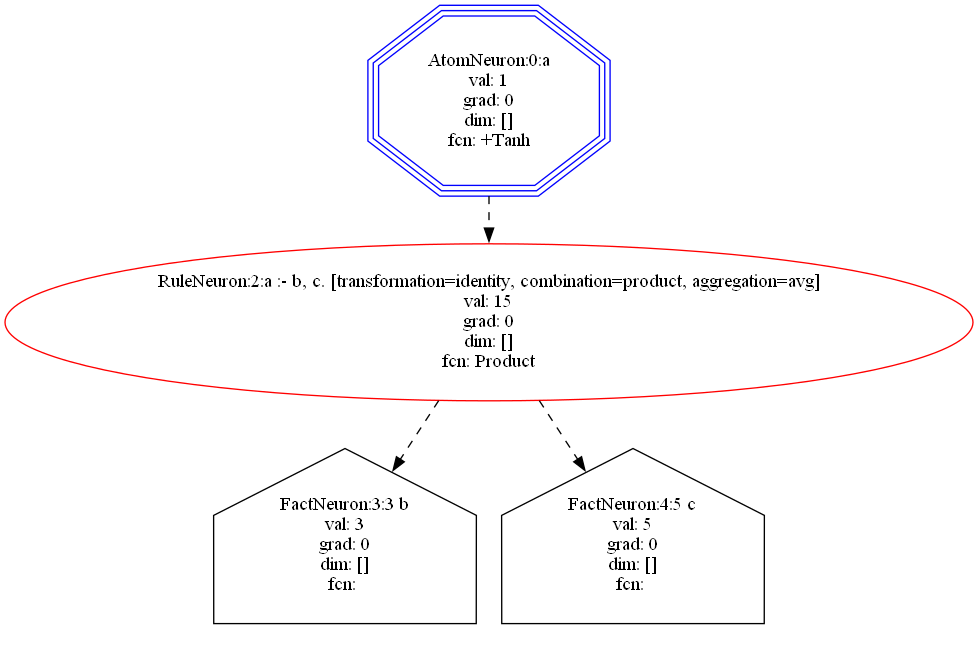

In [6]:
build_dataset[0].draw()